In [490]:
import requests
import math
import numpy as np
import datetime

In [ ]:
r2_redo_dec8_2300 = requests.get("https://api.weather.gov/gridpoints/OKX/40,32")

In [324]:
test2= r2_redo_dec8_2300.json()

In [325]:
test2

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wmoUnit': 'https://codes.wmo.int/common/unit/',
   'nwsUnit': 'https://api.weather.gov/ontology/unit/'}],
 'id': 'https://api.weather.gov/gridpoints/OKX/40,32',
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-73.8052943, 40.6564811],
    [-73.8097992, 40.634793],
    [-73.7812193, 40.6313728],
    [-73.7767085, 40.6530605],
    [-73.8052943, 40.6564811]]]},
 'properties': {'@id': 'https://api.weather.gov/gridpoints/OKX/40,32',
  '@type': 'wx:Gridpoint',
  'updateTime': '2021-12-12T20:04:11+00:00',
  'validTimes': '2021-12-12T14:00:00+00:00/P7DT17H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 7.0104},
  'forecastOffice': 'https://api.weather.gov/offices/OKX',
  'gridId': 'OKX',
  'gridX': '40',
  'gridY': '32',
  'temperature': {'uom': 'wmoUnit:degC',
   'values': [{'validTime': '2021-12-12T14:00:00+00:00/PT2H',
     'value': 6.666666666666667},
    {'validTi

### Get US station metadata

In [169]:
file = "data/stations.txt"

with open(file, 'rb') as f:
        list_st = f.readlines()

In [170]:
list_string = [i.decode("utf-8") for i in list_st]

In [547]:
list_string[20:35]

['USAF   WBAN  STATION NAME                  CTRY ST CALL  LAT     LON      ELEV(M) BEGIN    END\n',
 '\n',
 '007018 99999 WXPOD 7018                                  +00.000 +000.000 +7018.0 20110309 20130730\n',
 '007026 99999 WXPOD 7026                    AF            +00.000 +000.000 +7026.0 20120713 20170822\n',
 '007070 99999 WXPOD 7070                    AF            +00.000 +000.000 +7070.0 20140923 20150926\n',
 '008260 99999 WXPOD8270                                   +00.000 +000.000 +0000.0 20050101 20120731\n',
 '008268 99999 WXPOD8278                     AF            +32.950 +065.567 +1156.7 20100519 20120323\n',
 '008307 99999 WXPOD 8318                    AF            +00.000 +000.000 +8318.0 20100421 20100421\n',
 '008411 99999 XM20                                                                 20160217 20160217\n',
 '008414 99999 XM18                                                                 20160216 20160217\n',
 '008415 99999 XM21                         

In [202]:
from collections import namedtuple

In [252]:
stations_world = []
station_i = namedtuple("station", "usaf wban station_code st_name country state call latitude longitude elevation begin end forecastlink")

for i in list_string[22:]:
    usaf = i[:6].replace(" ", "")
    wban = i[7:12].replace(" ", "")
    station_code = i[13:18].replace(" ", "")
    st_name = i[19:42].replace(" ", "")
    country = i[43:45].replace(" ", "")
    state = i[48:50].replace(" ", "")
    call = i[51:55].replace(" ", "")
    latitude = i[57:64].replace(" ", "")
    longitude = i[65:73].replace(" ", "")
    elevation = i[74:81].replace(" ", "")
    begin = i[82:90].replace(" ", "")
    end = i[91:99].replace(" ", "")
    try:
        forecastlink = requests.get("https://api.weather.gov/points/"+latitude+","+longitude).json()['properties']['forecastGridData']
    except KeyError:
        forecastlink = ""
    
    stations_world.append(station_i(usaf, wban, station_code, st_name, country, state, call, latitude, longitude, elevation, begin, end, forecastlink))

for i in stations_world:
    if i.latitude == "":
        stations_world.remove(i)
    elif i.longitude == "":
        stations_world.remove(i)

In [240]:
stations_us = [] 

for i in list_string[22:]:
    if i[43:45] == "US":
        usaf = i[:6].replace(" ", "")
        wban = i[7:12].replace(" ", "")
        station_code = i[13:18].replace(" ", "")
        st_name = i[19:42].replace(" ", "")
        country = i[43:45].replace(" ", "")
        state = i[48:50].replace(" ", "")
        call = i[51:55].replace(" ", "")
        latitude = i[57:64].replace(" ", "").replace("+","")
        longitude = i[65:73].replace(" ", "").replace("+","")
        elevation = i[74:81].replace(" ", "").replace("+","")
        begin = i[82:90].replace(" ", "")
        end = i[91:99].replace(" ", "")
        try:
            forecastlink = requests.get("https://api.weather.gov/points/"+latitude+","+longitude).json()['properties']['forecastGridData']
        except KeyError:
            forecastlink = ""
        stations_us.append(station_i(usaf, wban, station_code, st_name, country, state, call, latitude, longitude, elevation, begin, end, forecastlink))
    else:
        pass

In [241]:
len(stations_us)

7162

In [242]:
for i in stations_us:
    if i.latitude == "":
        stations_us.remove(i)
    elif i.longitude == "":
        stations_us.remove(i)

In [243]:
len(stations_us)

7090

In [356]:
for i in stations_us:
    try: 
        if requests.get("https://api.weather.gov/points/"+i.latitude+","+i.longitude).json()["status"] == 404:
            stations_us.remove(i)
    except KeyError:
        pass

KeyboardInterrupt: 

In [357]:
len(stations_us)

7058

### Export stations

In [472]:
import csv
with open('US_stations.csv', 'w',) as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['usaf', 'wban', 'station_code', 'st_name', 'country', 'state', 'call', 'latitude', 'longitude', 'elevation', 'begin', 'end', 'forecast_api_endpoint'])
    for station in stations_us:
        writer.writerow([station.usaf, station.wban, station.station_code, station.st_name, station.country, station.state, station.call, station.latitude,\
                        station.longitude, station.elevation, station.begin, station.end, station.forecastlink])

In [258]:
import csv
with open('world_stations.csv', 'w',) as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['usaf', 'wban', 'station_code', 'st_name', 'country', 'state', 'call', 'latitude', 'longitude', 'elevation', 'begin', 'end', 'forecast_api_endpoint'])
    for station in stations_world:
        writer.writerow([station.usaf, station.wban, station.station_code, station.st_name, station.country, station.state, station.call, station.latitude,\
                        station.longitude, station.elevation, station.begin, station.end, station.forecastlink])

### For select location historicals

In [260]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:////Users/nk/Documents/Metis/07 Engineering/Project/data/weather.db")

In [263]:
database_tables = engine.table_names()

In [268]:
database_tables_dict = {}
for i in stations_us: 
    if i.call in database_tables:
        database_tables_dict[i.call] = i

In [269]:
database_tables_dict

{'KDVO': station(usaf='720406', wban='99999', station_code='GNOSS', st_name='FIELDAIRPORT', country='US', state='CA', call='KDVO', latitude='38.150', longitude='-122.550', elevation='+0000.6', begin='20071114', end='20140730', forecastlink='https://api.weather.gov/gridpoints/MTR/87,144'),
 'KEYW': station(usaf='999999', wban='12836', station_code='KEYW', st_name='STINTLARPT', country='US', state='FL', call='KEYW', latitude='24.555', longitude='-081.752', elevation='+0006.4', begin='19480101', end='19721231', forecastlink='https://api.weather.gov/gridpoints/KEY/62,47'),
 'KMIA': station(usaf='999999', wban='12839', station_code='MIAMI', st_name='INTLAP', country='US', state='FL', call='KMIA', latitude='25.791', longitude='-080.316', elevation='+0009.1', begin='19480101', end='19721231', forecastlink='https://api.weather.gov/gridpoints/MFL/104,50'),
 'KHTO': station(usaf='722098', wban='99999', station_code='EAST', st_name='AMPTON', country='US', state='NY', call='KHTO', latitude='40.967

In [ ]:
import pickle 

f = open("select_stations_metadata.pkl","wb")
pickle.dump(database_tables_dict,f)
f.close()

### Helper functions to organize forecast API output 

In [491]:
def temp_forecast (x):
# api is forecastGridData endpoint e.g. 'https://api.weather.gov/gridpoints/EPZ/106,80'; can be called by stations_us.forecastlink
    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['temperature']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [499]:
def dew_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['dewpoint']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [500]:
def hum_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['relativeHumidity']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [501]:
def wind_d_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['windDirection']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [506]:
def wind_s_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['windSpeed']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [503]:
def wind_g_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['windGust']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [504]:
def prcp_p_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['probabilityOfPrecipitation']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [ ]:
def prcp_q_forecast (x):

    api = requests.get(x).json()
    dates = []
    output = []

    for i in api['properties']['quantitativePrecipitation']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates.append(dateobject)
            output.append(forecast)
        else:
            dates.append(dateobject)
            output.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates.append(dateobject)
                output.append(forecast)
                forhowmany -= 1
    
    return dates, output

In [531]:
def tw_forecast (x):
# api is forecastGridData endpoint e.g. 'https://api.weather.gov/gridpoints/EPZ/106,80'; can be called by stations_us.forecastlink
    api = requests.get(x).json()
    dates_t = []
    dates_wd = []
    dates_ws = []
    output_t = []
    output_wd = []
    output_ws = []

    for i in api['properties']['temperature']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates_t.append(dateobject)
            output_t.append(forecast)
        else:
            dates_t.append(dateobject)
            output_t.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates_t.append(dateobject)
                output_t.append(forecast)
                forhowmany -= 1
                
    for i in api['properties']['windDirection']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates_wd.append(dateobject)
            output_wd.append(forecast)
        else:
            dates_wd.append(dateobject)
            output_wd.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates_wd.append(dateobject)
                output_wd.append(forecast)
                forhowmany -= 1
                
    for i in api['properties']['windSpeed']['values']:
        date, hour = i['validTime'].split("T")[0], i['validTime'].split("T")[1].split("+")[0]
        dateobject = datetime.datetime.strptime(date + " " + hour, '%Y-%m-%d %H:%M:%S')
        forhowmany = int(i['validTime'].split("T")[2].split("H")[0])
        forecast = round(i['value'],2)
        
        if forhowmany == 1:
            dates_ws.append(dateobject)
            output_ws.append(forecast)
        else:
            dates_ws.append(dateobject)
            output_ws.append(forecast)
            while forhowmany > 1:
                dateobject += datetime.timedelta(hours=1)
                dates_ws.append(dateobject)
                output_ws.append(forecast)
                forhowmany -= 1
    
    return dates_t, dates_ws, dates_wd, output_t, output_ws, output_wd

In [390]:
def append_value(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        pass

In [410]:
def generate_forecast(api):
    t1, temp = temp_forecast(api)
    t2, dew = dew_forecast(api)
    t3, hum = hum_forecast(api)
    t4, wd = wind_d_forecast(api)
    t5, ws = wind_s_forecast(api)
    t6, wg = wind_g_forecast(api)
    t7, pp = prcp_p_forecast(api)
    t8, pq = prcp_q_forecast(api)
    
#     output = dict(zip(t1, temp))
    
#     for key, value in dict(zip(t2, dew)):
#         append_value(output, key, value)
    output = [t1, temp] 
    
    if t1 == t2:
        output.append(dew)
        output.append(hum)
        output.append(wd)
        output.append(ws)
        output.append(wg)
        output.append(pp)
        output.append(pq)
        
    return output

In [412]:
for i in generate_forecast(test2):
    print(len(i))

185
185
185
185
185
185
185
142
82
70


### Find euclidean distance 

In [443]:
def distance_calc(a, b):
    R = 3963
    lat1 = math.radians(float(a.latitude))
    lon1 = math.radians(float(a.longitude))
    lat2 = math.radians(float(b.latitude))
    lon2 = math.radians(float(b.longitude))
    
    lat_d = lat1 - lat2
    lon_d = lon1 - lon2

    p = math.sin(lat_d / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(lon_d / 2)**2
    c = 2 * math.atan2(math.sqrt(p), math.sqrt(1 - p))
    
    distance = R * c
    
    return distance

In [444]:
distance_calc(stations_us[501], stations_us[600])

345.9488248067571

In [538]:
def n_neighbors(input_station, n):
    
    placeholder1 = []
    placeholder2 = []

    for i in stations_us:
        placeholder1.append(i)
        placeholder2.append(distance_calc(input_station,i))

    distances = np.array(placeholder2)
    location_idx = np.argsort(distances)[:n].tolist()

    
############ FIX SCATTER PLOT TO SHOW INDIVIDUALLY ### 
    for i in location_idx:
        try:
            tt, tws, twd, temp, winds, windd = tw_forecast(placeholder1[i].forecastlink)
            sns.scatterplot(tws, winds)
            sns.scatterplot(twd, windd)
            sns.scatterplot(tt, temp)
            print(placeholder1[i])
        except KeyError:
            print("Forecast not available for the station")

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

station(usaf='720626', wban='00213', station_code='PAMPA', st_name='MESAVISTAAIRPORT', country='US', state='TX', call='KBPC', latitude='35.883', longitude='-101.033', elevation='+0845.2', begin='20090326', end='20211208', forecastlink='https://api.weather.gov/gridpoints/AMA/77,53')
station(usaf='720313', wban='03052', station_code='PERRY', st_name='LEFORSFIELDAIRPORT', country='US', state='TX', call='KPPA', latitude='35.613', longitude='-100.996', elevation='+0989.1', begin='20060101', end='20211208', forecastlink='https://api.weather.gov/gridpoints/AMA/78,41')
station(usaf='723635', wban='03024', station_code='HUTCH', st_name='NSONCOUNTYAIRPORT', country='US', state='TX', call='KBGD', latitude='35.695', longitude='-101.395', elevation='+0930.9', begin='20060101', end='20211208', forecastlink='https://api.weather.gov/gridpoints/AMA/64,45')


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

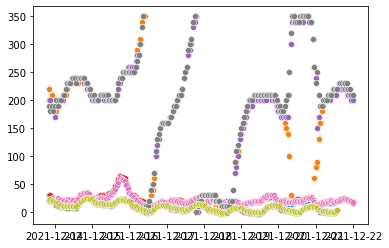

In [539]:
n_neighbors(stations_us[525], 3)

In [532]:
tt, tws, twd, temp, winds, windd = tw_forecast(stations_us[525].forecastlink)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:>

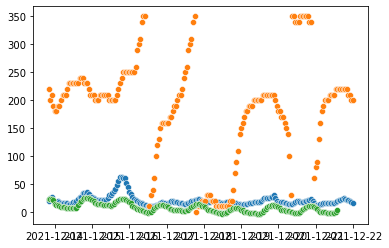

In [537]:
sns.scatterplot(tws, winds)
sns.scatterplot(twd, windd)
sns.scatterplot(tt, temp)
# matplotlib.axes.Axes.quiver

In [466]:
for i in stations_us:
    if len(i.latitude) < 1:
        print(i)
    

In [464]:
for i in stations_us:
    if len(i.latitude) < 1:
        stations_us.remove(i)
    elif len(i.longitude) < 1:
        stations_us.remove(i)
    elif i.usaf == '997957':
        stations_us.remove(i)

In [465]:
len(stations_us)

4595

In [468]:
len(placeholder2)

4595

In [540]:
stations_us[525]

station(usaf='720626', wban='00213', station_code='PAMPA', st_name='MESAVISTAAIRPORT', country='US', state='TX', call='KBPC', latitude='35.883', longitude='-101.033', elevation='+0845.2', begin='20090326', end='20211208', forecastlink='https://api.weather.gov/gridpoints/AMA/77,53')

In [546]:
len((wind_d_forecast(stations_us[525].forecastlink)[1]))

198

In [555]:
str(requests.get('https://api.weather.gov/gridpoints/AMA/77,53').json()['properties']).count(",")

3980